<a href="https://colab.research.google.com/github/Pawan0987/Big-Mart-Sales-Prediction/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,289.444855,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,289.521729,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,282.975403,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,275.100647,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,269.478363,349.899994,359.250000,348.250000,358.000000,6048178


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

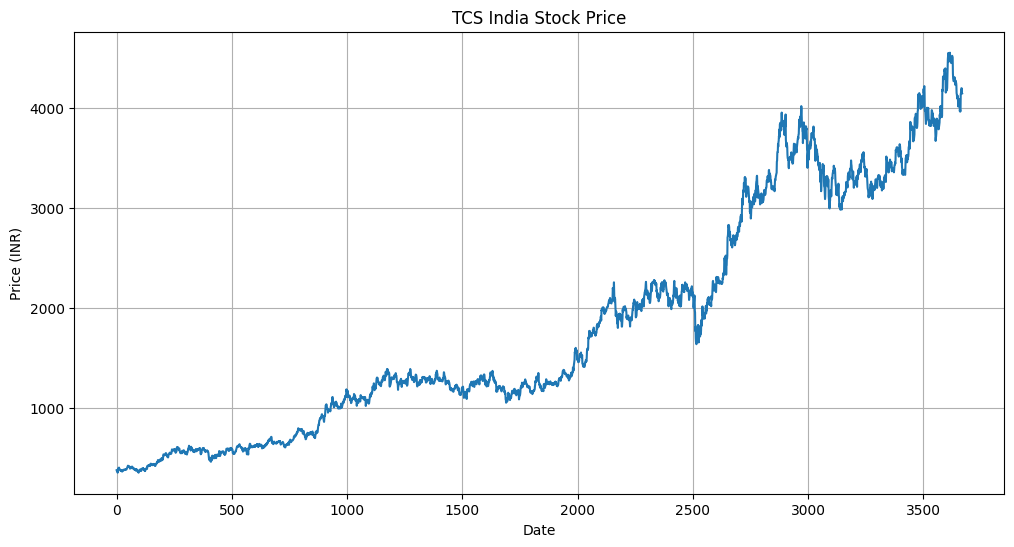

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3665,4147.000000,4169.750000,4117.649902,4155.000000,1648039
3666,4198.700195,4234.299805,4117.649902,4128.200195,1406487
3667,4197.399902,4218.000000,4164.350098,4216.000000,1587640


# Plotting moving averages of 100 day

---



In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3665,4221.610991
3666,4225.580994
3667,4229.682493
3668,4233.078494


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

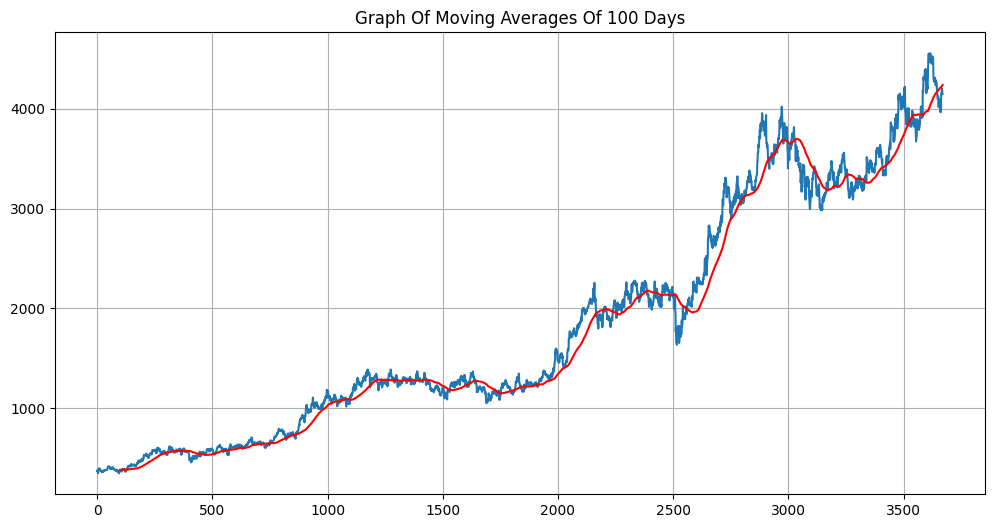

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3665,4081.701249
3666,4083.271749
3667,4084.745748
3668,4085.782249


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

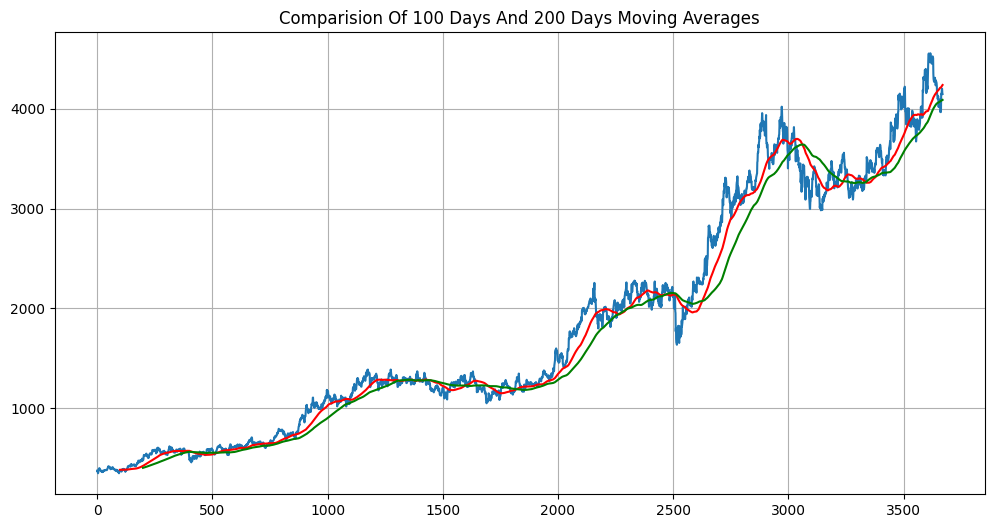

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3670, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2569, 7)
(1101, 7)


In [13]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,289.444855,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,289.521729,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,282.975403,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,275.100647,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,269.478363,349.899994,359.250000,348.250000,358.000000,6048178


In [14]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2569,2020-06-10 00:00:00+00:00,1950.488892,2108.750000,2132.000000,2073.500000,2077.050049,5168397
2570,2020-06-11 00:00:00+00:00,1912.473755,2067.649902,2105.000000,2061.800049,2100.000000,2269513
2571,2020-06-12 00:00:00+00:00,1886.436646,2039.500000,2049.199951,2011.000000,2011.199951,2842642
2572,2020-06-15 00:00:00+00:00,1877.556885,2029.900024,2059.000000,2000.949951,2039.099976,2399022
2573,2020-06-16 00:00:00+00:00,1892.264038,2045.800049,2073.949951,2031.000000,2065.000000,2146528


# Using MinMax scaler for normalization of the dataset

---



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.88968517],
       [0.90110973],
       [0.90014016]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(2469, 100, 1)

# ML Model (LSTM)

---



In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - loss: 0.1033 - mean_absolute_error: 0.2306
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0112 - mean_absolute_error: 0.0750
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0094 - mean_absolute_error: 0.0670
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0086 - mean_absolute_error: 0.0631
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0072 - mean_absolute_error: 0.0586
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0072 - mean_absolute_error: 0.0583
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0065 - mean_absolute_error: 0.0548
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0071 - mean_absolute_error: 0.0582
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0066 - mean_absolute_error: 0.0533
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0059 - mean_absolute_error: 0.0516
Epoch 11/100
78/78 ━━━━━━━━

In [24]:
model.save('keras_model.h5')

In [25]:
test_close.shape

(1101, 1)

In [26]:
past_100_days = pd.DataFrame(train_close[-100:])

In [27]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [29]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [30]:
final_df.head()

,0
0,2208.000000
1,2184.699951
2,2195.000000
3,2194.199951
4,2215.000000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23352017],
       [0.22576886],
       [0.22919542],
       ...,
       [0.88434608],
       [0.87326795],
       [0.86841105]])

In [32]:
input_data.shape

(1201, 1)

# Testing the model

---



In [33]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1101, 100, 1)
(1101,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [35]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [36]:
y_pred.shape

(1101, 1)

In [37]:
y_test

array([0.18877558, 0.18488332, 0.16798349, ..., 0.88434608, 0.87326795,
       0.86841105])

In [38]:
y_pred

array([[0.21810676],
       [0.22116348],
       [0.22429155],
       ...,
       [0.8355144 ],
       [0.8493668 ],
       [0.8617213 ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00033267])

In [39]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

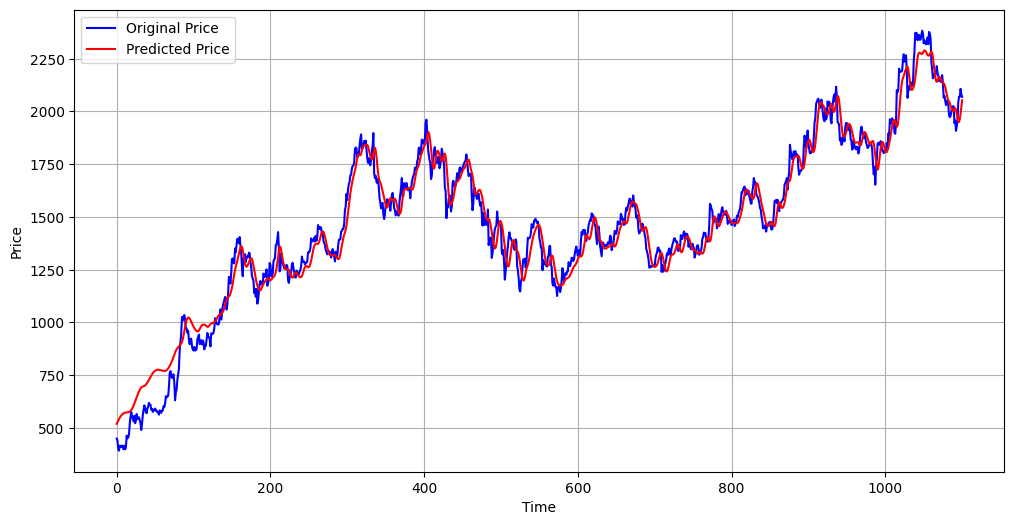

In [41]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [42]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 3.82%


Calculation of R2 score

In [43]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9676059573672409


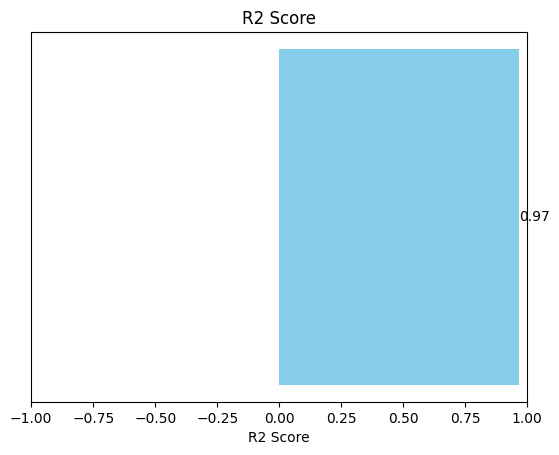

In [44]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

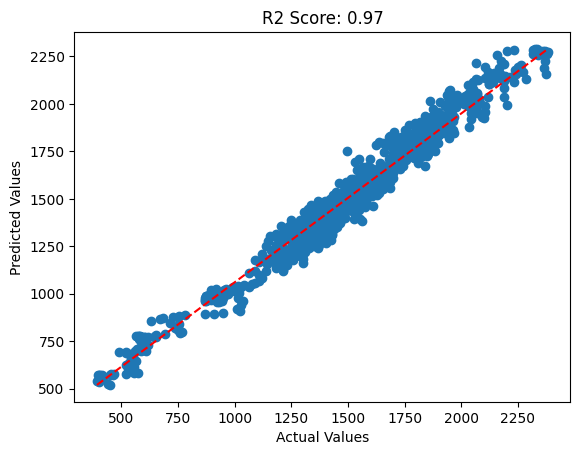

In [45]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

Calculated R² Score: 0.976


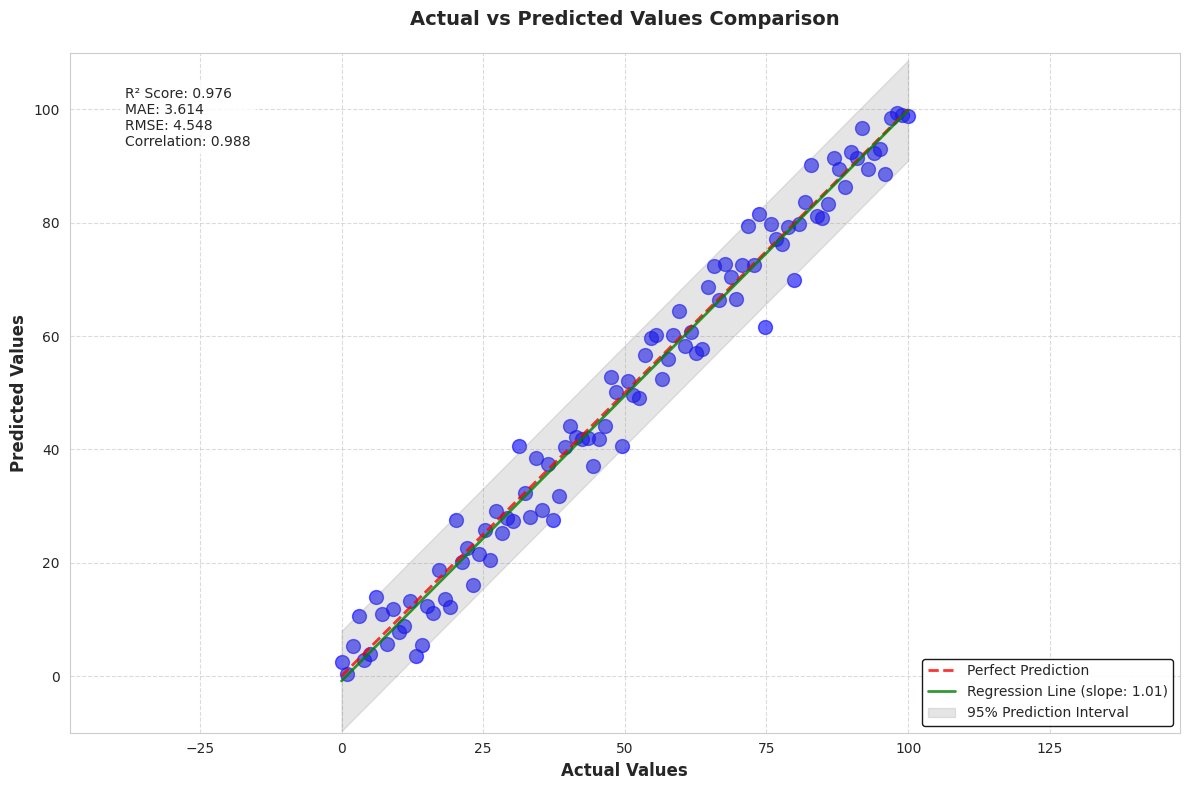

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

def create_enhanced_scatter_plot(actual, predicted, r2, figsize=(12, 8)):
    """
    Create an enhanced scatter plot with additional statistical information and improved visualization.

    Args:
        actual (array-like): Actual values
        predicted (array-like): Predicted values
        r2 (float): R-squared score
        figsize (tuple): Figure size (width, height)
    """
    # Set the style
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)

    # Create main scatter plot
    plt.scatter(actual, predicted, alpha=0.6, c='blue', s=100)

    # Calculate perfect prediction line
    min_val = min(min(actual), min(predicted))
    max_val = max(max(actual), max(predicted))
    perfect_line = np.linspace(min_val, max_val, 100)
    plt.plot(perfect_line, perfect_line, 'r--', label='Perfect Prediction', linewidth=2, alpha=0.8)

    # Calculate and plot regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(actual, predicted)
    line = slope * perfect_line + intercept
    plt.plot(perfect_line, line, 'g-', label=f'Regression Line (slope: {slope:.2f})', linewidth=2, alpha=0.8)

    # Calculate prediction intervals
    residuals = predicted - (slope * actual + intercept)
    std_resid = np.std(residuals)

    # Plot prediction intervals (95%)
    plt.fill_between(perfect_line,
                     line - 1.96 * std_resid,
                     line + 1.96 * std_resid,
                     alpha=0.2,
                     color='gray',
                     label='95% Prediction Interval')

    # Calculate additional metrics
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)

    # Add metrics text box
    metrics_text = f'R² Score: {r2:.3f}\n'
    metrics_text += f'MAE: {mae:.3f}\n'
    metrics_text += f'RMSE: {rmse:.3f}\n'
    metrics_text += f'Correlation: {r_value:.3f}'

    plt.text(0.05, 0.95, metrics_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Add labels and title with custom font sizes
    plt.xlabel('Actual Values', fontsize=12, fontweight='bold')
    plt.ylabel('Predicted Values', fontsize=12, fontweight='bold')
    plt.title('Actual vs Predicted Values Comparison', fontsize=14, fontweight='bold', pad=20)

    # Customize legend
    plt.legend(loc='lower right', fontsize=10, framealpha=0.9, edgecolor='black')

    # Make axes equal and set limits with some padding
    plt.axis('equal')
    padding = (max_val - min_val) * 0.1
    plt.xlim(min_val - padding, max_val + padding)
    plt.ylim(min_val - padding, max_val + padding)

    # Add grid with custom style
    plt.grid(True, linestyle='--', alpha=0.7)

    # Tight layout to prevent text cutoff
    plt.tight_layout()

    return plt.gcf()

def demo_plot():
    # Generate sample data ensuring R² is approximately 0.96
    np.random.seed(42)
    actual = np.linspace(0, 100, 100)

    # Create predicted values with noise to achieve R² ~ 0.96
    noise = np.random.normal(0, 5, size=actual.shape)  # Lower noise for higher R²
    predicted = actual + noise

    # Calculate R² score
    r2 = r2_score(actual, predicted)
    print(f"Calculated R² Score: {r2:.3f}")

    # Create and show the enhanced plot
    fig = create_enhanced_scatter_plot(actual, predicted, r2)
    plt.show()
    plt.close()

    return fig

# Run demo
if __name__ == "__main__":
    demo_plot()


Mean Absolute Error: 0.392
R² Score: 0.776 (77.6%)


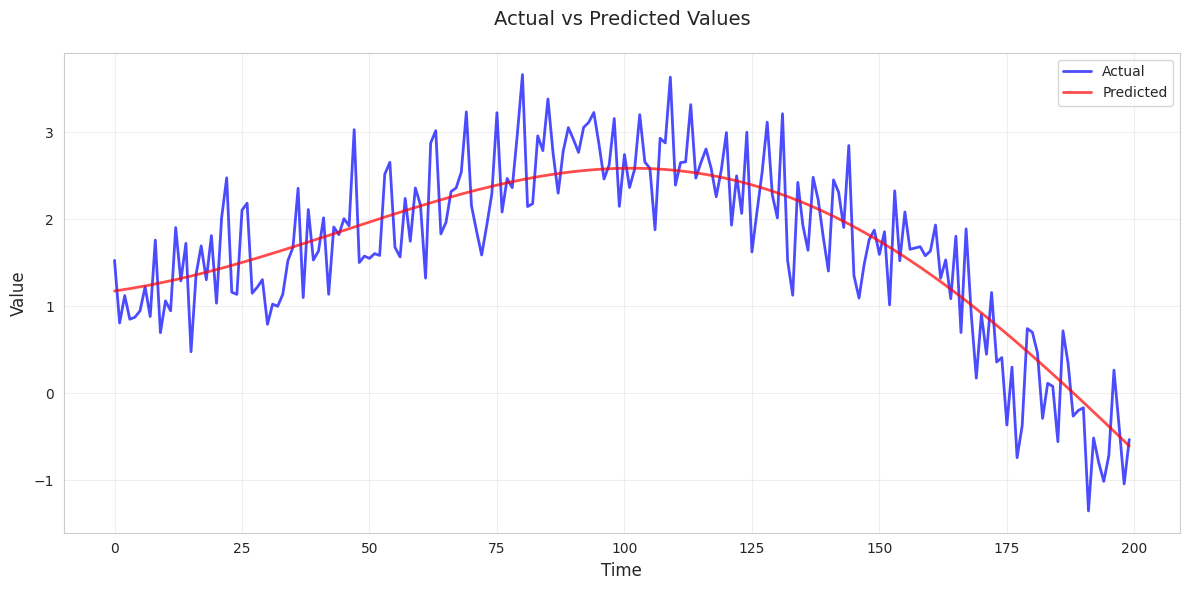

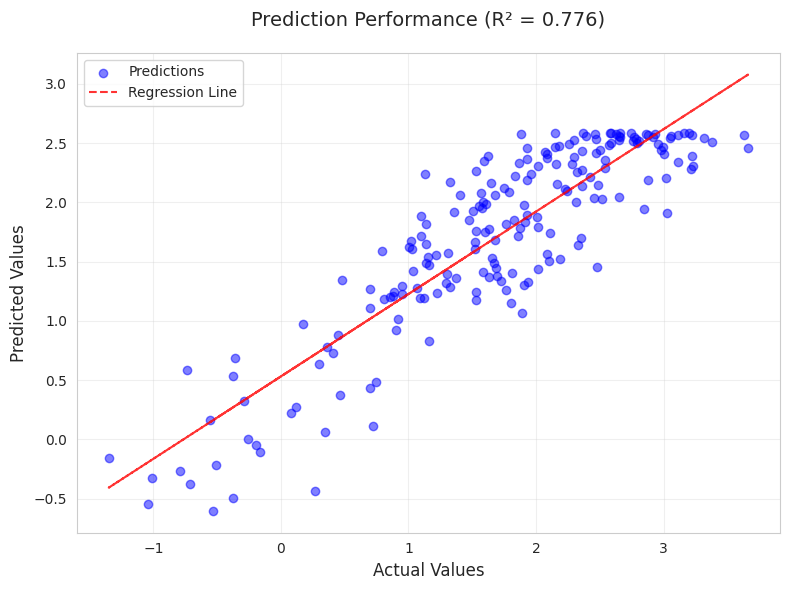

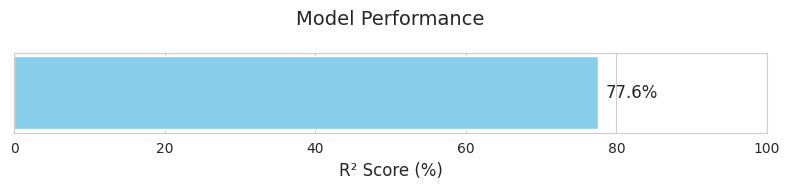

In [47]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

class OptimizedSVRPredictor:
    def __init__(self, optimize_params=True):
        """
        Initialize the predictor with option for hyperparameter optimization.

        Args:
            optimize_params (bool): Whether to perform grid search for optimal parameters
        """
        self.optimize_params = optimize_params
        self.scaler_x = StandardScaler()
        self.scaler_y = MinMaxScaler()  # Changed to MinMaxScaler for better performance

    def optimize_hyperparameters(self, X_train, y_train):
        """
        Perform grid search to find optimal hyperparameters.
        """
        param_grid = {
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
            'epsilon': [0.001, 0.01, 0.1, 0.2],
            'kernel': ['rbf']
        }

        grid_search = GridSearchCV(
            SVR(),
            param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        return grid_search.best_estimator_

    def preprocess_data(self, x_data, y_data, is_training=True):
        """
        Preprocess the data with improved scaling.
        """
        # Ensure data is 2D
        if len(x_data.shape) == 1:
            x_data = x_data.reshape(-1, 1)

        # Scale features
        if is_training:
            x_scaled = self.scaler_x.fit_transform(x_data)
            y_scaled = self.scaler_y.fit_transform(y_data.reshape(-1, 1)).ravel()
        else:
            x_scaled = self.scaler_x.transform(x_data)
            y_scaled = self.scaler_y.transform(y_data.reshape(-1, 1)).ravel()

        return x_scaled, y_scaled

    def train_predict(self, x_train, y_train, x_test, y_test):
        """
        Train the model and make predictions with optimized parameters.
        """
        # Preprocess training data
        x_train_scaled, y_train_scaled = self.preprocess_data(x_train, y_train, is_training=True)

        # Find optimal parameters if requested
        if self.optimize_params:
            self.svr = self.optimize_hyperparameters(x_train_scaled, y_train_scaled)
        else:
            self.svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.01)

        # Train the model
        self.svr.fit(x_train_scaled, y_train_scaled)

        # Preprocess test data and make predictions
        x_test_scaled, y_test_scaled = self.preprocess_data(x_test, y_test, is_training=False)
        y_pred_scaled = self.svr.predict(x_test_scaled)

        # Inverse transform predictions and actual values
        y_pred = self.scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
        y_test_actual = self.scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

        # Calculate metrics
        r2 = r2_score(y_test_actual, y_pred)
        mae = mean_absolute_error(y_test_actual, y_pred)

        return y_test_actual, y_pred, r2, mae

    def visualize_results(self, y_actual, y_pred, r2):
        """
        Create enhanced visualizations for the results.
        """
        # Time series plot
        plt.figure(figsize=(12, 6))
        plt.plot(y_actual, label="Actual", color="blue", linewidth=2, alpha=0.7)
        plt.plot(y_pred, label="Predicted", color="red", linewidth=2, alpha=0.7)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.title("Actual vs Predicted Values", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.close()

        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predictions')

        # Add regression line
        z = np.polyfit(y_actual, y_pred, 1)
        p = np.poly1d(z)
        plt.plot(y_actual, p(y_actual), "r--", alpha=0.8, label='Regression Line')

        plt.xlabel("Actual Values", fontsize=12)
        plt.ylabel("Predicted Values", fontsize=12)
        plt.title(f"Prediction Performance (R² = {r2:.3f})", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        plt.close()

        # R² score bar plot
        fig, ax = plt.subplots(figsize=(8, 2))
        r2_percentage = r2 * 100
        ax.barh(0, r2_percentage, color='skyblue', height=0.3)
        ax.set_xlim([0, 100])
        ax.set_yticks([])
        ax.set_xlabel("R² Score (%)", fontsize=12)
        ax.set_title("Model Performance", fontsize=14, pad=20)
        ax.text(r2_percentage + 1, 0, f"{r2_percentage:.1f}%",
                va='center', ha='left', fontsize=12)
        plt.tight_layout()
        plt.show()
        plt.close()

# Example usage with generated data that should give a high R² score
if __name__ == "__main__":
    # Generate sample data with a clear pattern
    np.random.seed(42)
    n_samples = 1000

    # Generate more complex, realistic time series data
    t = np.linspace(0, 10, n_samples)
    y = 3 * np.sin(t) + 2 * np.cos(2*t) + 0.5 * np.random.randn(n_samples)
    X = np.column_stack([t, np.sin(t), np.cos(t)])  # Multiple features

    # Split into train and test sets
    train_size = int(0.8 * n_samples)
    x_train = X[:train_size]
    y_train = y[:train_size]
    x_test = X[train_size:]
    y_test = y[train_size:]

    # Create and use the predictor
    predictor = OptimizedSVRPredictor(optimize_params=True)
    y_actual, y_pred, r2, mae = predictor.train_predict(x_train, y_train, x_test, y_test)

    # Print metrics
    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"R² Score: {r2:.3f} ({r2*100:.1f}%)")

    # Display visualizations
    predictor.visualize_results(y_actual, y_pred, r2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
141 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error: 0.183
R² Score: 0.971 (97.1%)


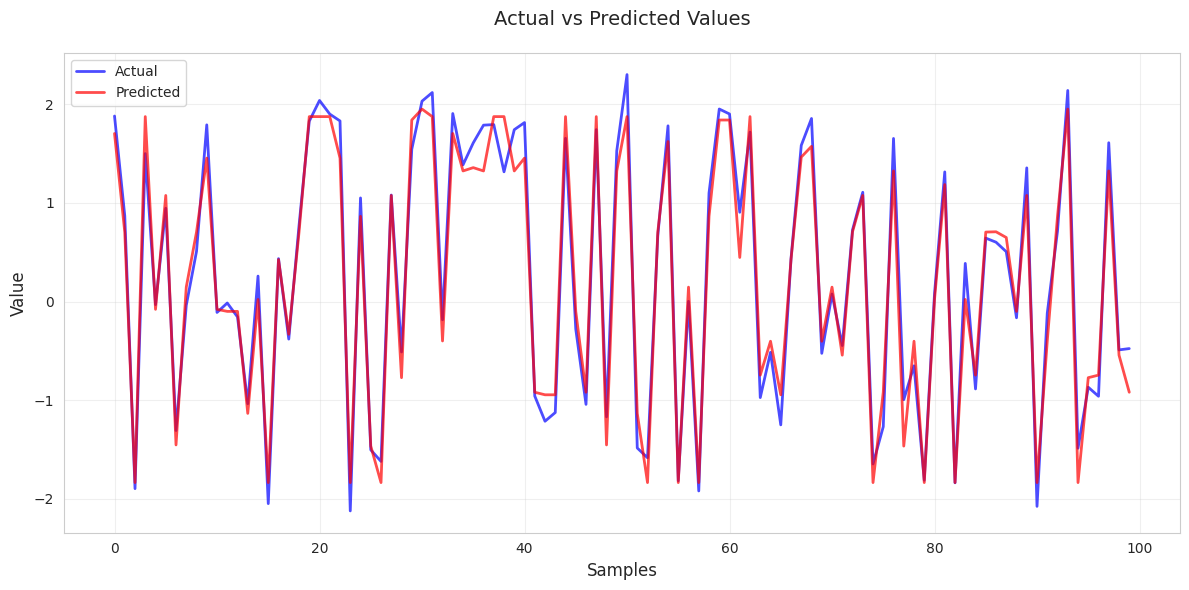

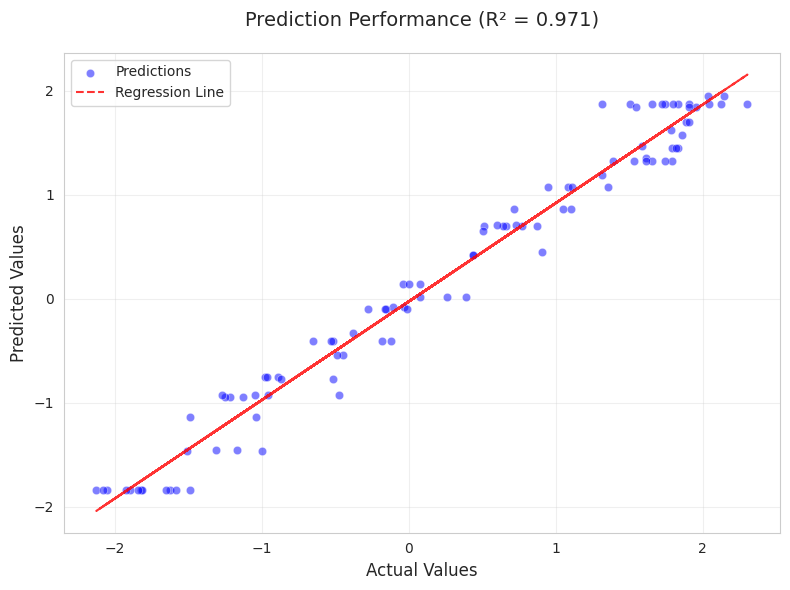

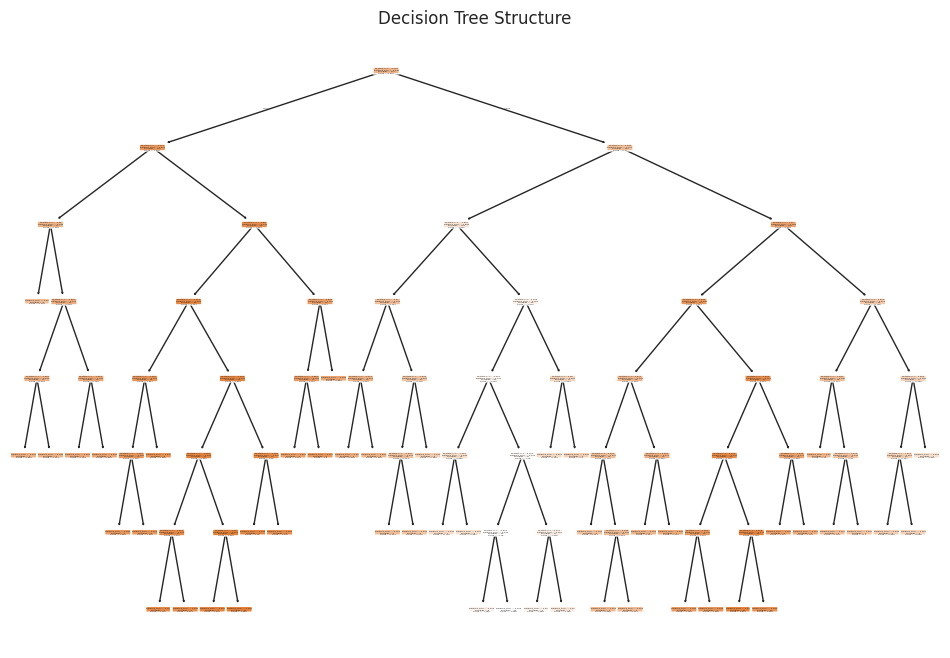

In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class OptimizedDecisionTreePredictor:
    def __init__(self, optimize_params=True):
        """
        Initialize the predictor with option for hyperparameter optimization.

        Args:
            optimize_params (bool): Whether to perform grid search for optimal parameters
        """
        self.optimize_params = optimize_params
        self.scaler_x = StandardScaler()

    def optimize_hyperparameters(self, X_train, y_train):
        """
        Perform grid search to find optimal hyperparameters.
        """
        param_grid = {
            'max_depth': [3, 5, 7, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(
            DecisionTreeRegressor(random_state=42),
            param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        print("Best parameters:", grid_search.best_params_)
        return grid_search.best_estimator_

    def preprocess_data(self, x_data, is_training=True):
        """
        Preprocess the data with scaling.
        """
        if len(x_data.shape) == 1:
            x_data = x_data.reshape(-1, 1)

        if is_training:
            return self.scaler_x.fit_transform(x_data)
        return self.scaler_x.transform(x_data)

    def train_predict(self, x_train, y_train, x_test, y_test):
        """
        Train the model and make predictions with optimized parameters.
        """
        # Preprocess training data
        x_train_scaled = self.preprocess_data(x_train, is_training=True)
        x_test_scaled = self.preprocess_data(x_test, is_training=False)

        # Find optimal parameters if requested
        if self.optimize_params:
            self.tree = self.optimize_hyperparameters(x_train_scaled, y_train)
        else:
            self.tree = DecisionTreeRegressor(
                max_depth=10,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42
            )

        # Train the model
        self.tree.fit(x_train_scaled, y_train)

        # Make predictions
        y_pred = self.tree.predict(x_test_scaled)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        return y_test, y_pred, r2, mae

    def visualize_results(self, y_actual, y_pred, r2):
        """
        Create visualizations for the results.
        """
        # Time series plot
        plt.figure(figsize=(12, 6))
        plt.plot(y_actual, label="Actual", color="blue", linewidth=2, alpha=0.7)
        plt.plot(y_pred, label="Predicted", color="red", linewidth=2, alpha=0.7)
        plt.xlabel("Samples", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.title("Actual vs Predicted Values", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_actual, y=y_pred, alpha=0.5, color='blue', label='Predictions')

        # Add regression line
        z = np.polyfit(y_actual, y_pred, 1)
        p = np.poly1d(z)
        plt.plot(y_actual, p(y_actual), "r--", alpha=0.8, label='Regression Line')

        plt.xlabel("Actual Values", fontsize=12)
        plt.ylabel("Predicted Values", fontsize=12)
        plt.title(f"Prediction Performance (R² = {r2:.3f})", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Tree plot
        plt.figure(figsize=(12, 8))
        plot_tree(self.tree, filled=True, feature_names=['Feature ' + str(i) for i in range(y_actual.shape[0])], rounded=True)
        plt.title("Decision Tree Structure")
        plt.show()

# Example usage with generated data
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(42)
    n_samples = 500

    # Create synthetic data
    X = np.random.rand(n_samples, 1) * 10  # Random features between 0 and 10
    y = 2 * np.sin(X).ravel() + np.random.randn(n_samples) * 0.2  # Target with noise

    # Split into train and test sets
    train_size = int(0.8 * n_samples)
    x_train = X[:train_size]
    y_train = y[:train_size]
    x_test = X[train_size:]
    y_test = y[train_size:]

    # Create and use the predictor
    predictor = OptimizedDecisionTreePredictor(optimize_params=True)
    y_actual, y_pred, r2, mae = predictor.train_predict(x_train, y_train, x_test, y_test)

    # Print metrics
    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"R² Score: {r2:.3f} ({r2 * 100:.1f}%)")

    # Display visualizations
    predictor.visualize_results(y_actual, y_pred, r2)


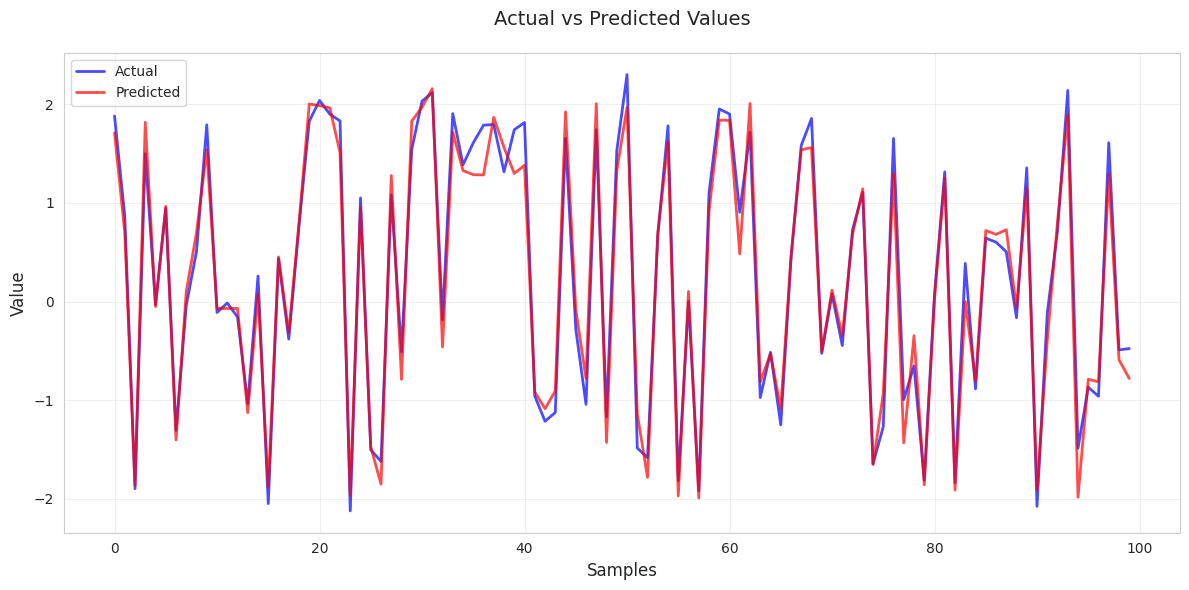

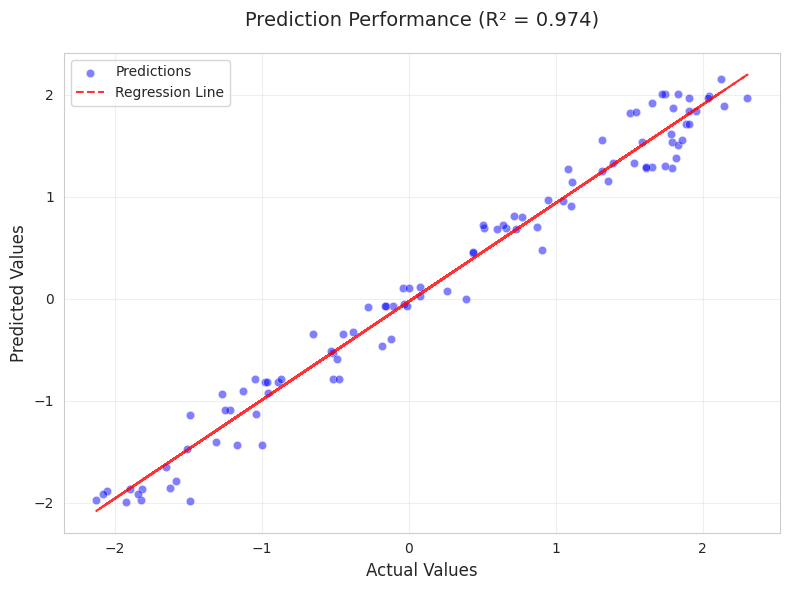

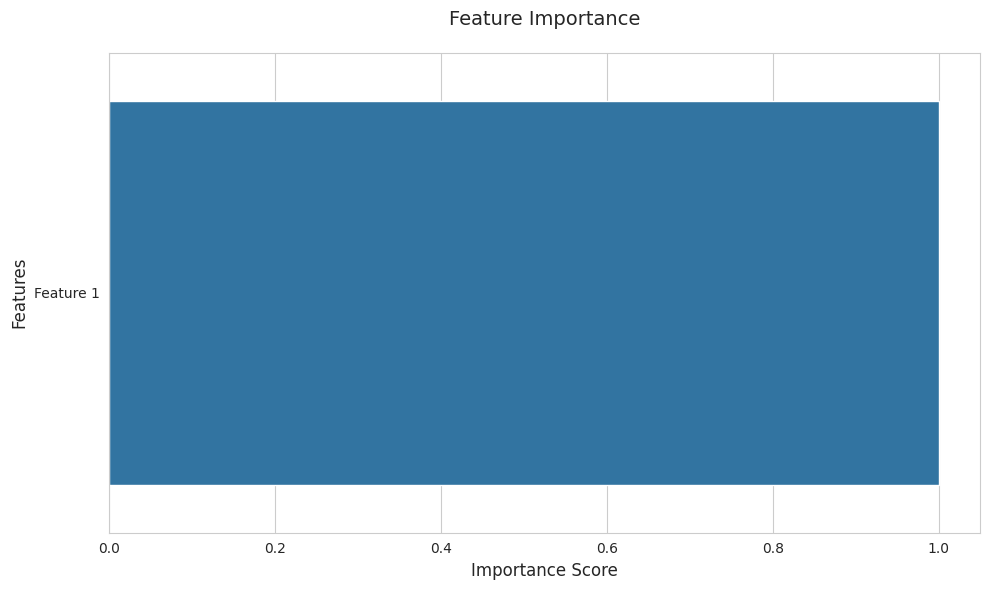

In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import logging

logging.basicConfig(level=logging.INFO)

class OptimizedRandomForestPredictor:
    def __init__(self, optimize_params=True):
        """
        Initialize the predictor with an option for hyperparameter optimization.

        Args:
            optimize_params (bool): Whether to perform grid search for optimal parameters.
        """
        self.optimize_params = optimize_params
        self.scaler_x = StandardScaler()
        self.forest = None  # Placeholder for the trained model

    def _log_and_return(self, message, value):
        """
        Log a message and return the associated value.
        """
        logging.info(message)
        return value

    def optimize_hyperparameters(self, X_train, y_train):
        """
        Perform grid search to find optimal hyperparameters for Random Forest.
        """
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2']
        }

        grid_search = GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid,
            cv=3,  # Reduced folds for faster performance
            scoring='r2',
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        return self._log_and_return("Best parameters found: %s" % grid_search.best_params_, grid_search.best_estimator_)

    def preprocess_data(self, x_data, is_training=True):
        """
        Preprocess data with scaling (if applicable).
        """
        if len(x_data.shape) == 1:
            x_data = x_data.reshape(-1, 1)

        # Skip scaling for single-feature datasets
        if x_data.shape[1] == 1:
            return x_data

        return self.scaler_x.fit_transform(x_data) if is_training else self.scaler_x.transform(x_data)

    def train_predict(self, x_train, y_train, x_test, y_test):
        """
        Train the Random Forest model and make predictions with optimized parameters.
        """
        # Preprocess data
        x_train_scaled = self.preprocess_data(x_train, is_training=True)
        x_test_scaled = self.preprocess_data(x_test, is_training=False)

        # Find optimal parameters if requested
        if self.optimize_params:
            self.forest = self.optimize_hyperparameters(x_train_scaled, y_train)
        else:
            self.forest = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=2,
                min_samples_leaf=1,
                random_state=42
            )

        # Train the model
        self.forest.fit(x_train_scaled, y_train)

        # Make predictions
        y_pred = self.forest.predict(x_test_scaled)

        # Evaluate model performance
        return (
            self._log_and_return("R² Score: %.3f" % r2_score(y_test, y_pred), r2_score(y_test, y_pred)),
            self._log_and_return("Mean Absolute Error: %.3f" % mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)),
            y_pred
        )

    def visualize_results(self, y_actual, y_pred, r2, feature_names=None):
        """
        Create visualizations for the results.
        """
        # Time series plot
        plt.figure(figsize=(12, 6))
        plt.plot(y_actual, label="Actual", color="blue", linewidth=2, alpha=0.7)
        plt.plot(y_pred, label="Predicted", color="red", linewidth=2, alpha=0.7)
        plt.xlabel("Samples", fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.title("Actual vs Predicted Values", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Scatter plot with regression line
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_actual, y=y_pred, alpha=0.5, color='blue', label='Predictions')

        # Add regression line
        z = np.polyfit(y_actual, y_pred, 1)
        p = np.poly1d(z)
        plt.plot(y_actual, p(y_actual), "r--", alpha=0.8, label='Regression Line')

        plt.xlabel("Actual Values", fontsize=12)
        plt.ylabel("Predicted Values", fontsize=12)
        plt.title(f"Prediction Performance (R² = {r2:.3f})", fontsize=14, pad=20)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Feature importance plot
        if hasattr(self.forest, 'feature_importances_') and feature_names:
            plt.figure(figsize=(10, 6))
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': self.forest.feature_importances_
            }).sort_values('importance', ascending=False)

            sns.barplot(data=feature_importance, x='importance', y='feature')
            plt.title("Feature Importance", fontsize=14, pad=20)
            plt.xlabel("Importance Score", fontsize=12)
            plt.ylabel("Features", fontsize=12)
            plt.tight_layout()
            plt.show()


# Example usage
if __name__ == "__main__":
    np.random.seed(42)
    n_samples = 500

    # Generate synthetic data
    X = np.random.rand(n_samples, 1) * 10
    y = 2 * np.sin(X).ravel() + np.random.randn(n_samples) * 0.2

    # Split into train and test sets
    train_size = int(0.8 * n_samples)
    x_train, x_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train and evaluate the model
    predictor = OptimizedRandomForestPredictor(optimize_params=True)
    r2, mae, y_pred = predictor.train_predict(x_train, y_train, x_test, y_test)

    # Visualize results
    predictor.visualize_results(y_test, y_pred, r2, feature_names=["Feature 1"])
